In [1]:
from __future__ import print_function, division, absolute_import

import GPy
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

import safeopt

mpl.rcParams['figure.figsize'] = (20.0, 10.0)
mpl.rcParams['font.size'] = 20
mpl.rcParams['lines.markersize'] = 20

In [2]:
# Measurement noise
noise_var = 0.05 ** 2


np.random.seed(2)
# Bounds on the inputs variable
bounds = [(-10., 10.)]
parameter_set = safeopt.linearly_spaced_combinations(bounds, 1000)

# Define Kernel
kernel = GPy.kern.RBF(input_dim=len(bounds), variance=2., lengthscale=1.0, ARD=True)

# Initial safe point
x0 = np.zeros((1, len(bounds)))
print(x0)




[[0.]]


In [3]:
# Define the objective function
fun = safeopt.sample_gp_function(kernel,bounds,noise_var,100)

# The statistical model of our objective function
gp = GPy.models.GPRegression(x0, fun(x0), kernel, noise_var=noise_var)

# The optimization routine
#opt = safeopt.SafeOptSwarm(gp, 0., bounds=bounds, threshold=0.2)
opt = safeopt.SafeOpt(gp, parameter_set, 0., threshold=0.2,beta=3)

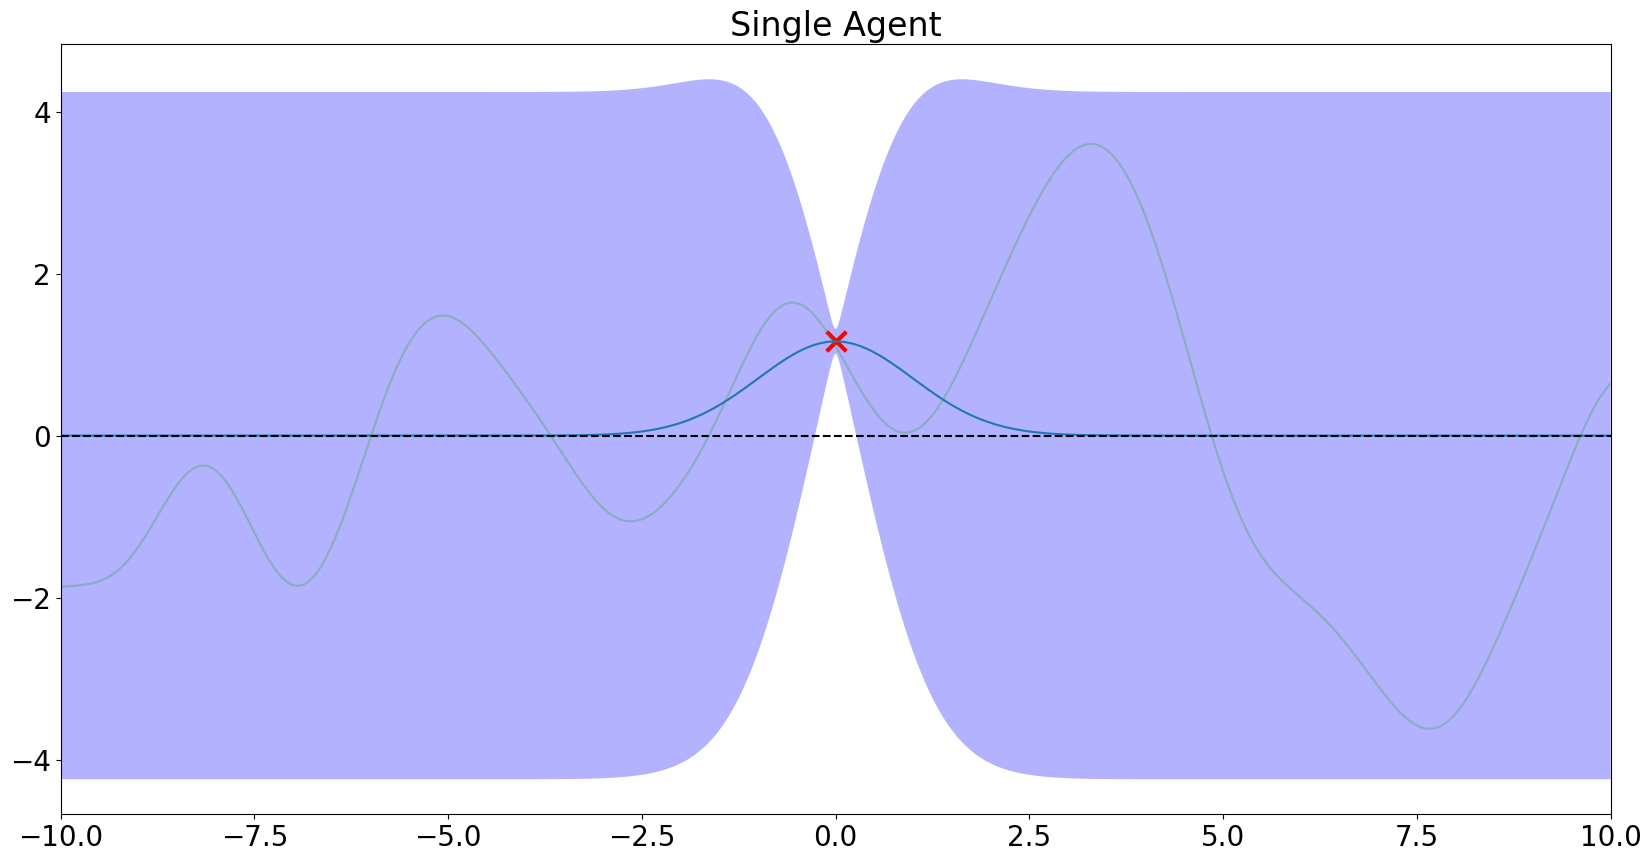

In [4]:
def plot_gp():
    # Plot the GP
    opt.plot(1000)
    # Plot the true function
    plt.plot(parameter_set, fun(parameter_set, noise=False), color='C2', alpha=0.3)
    plt.title("Single Agent")
    
plot_gp()

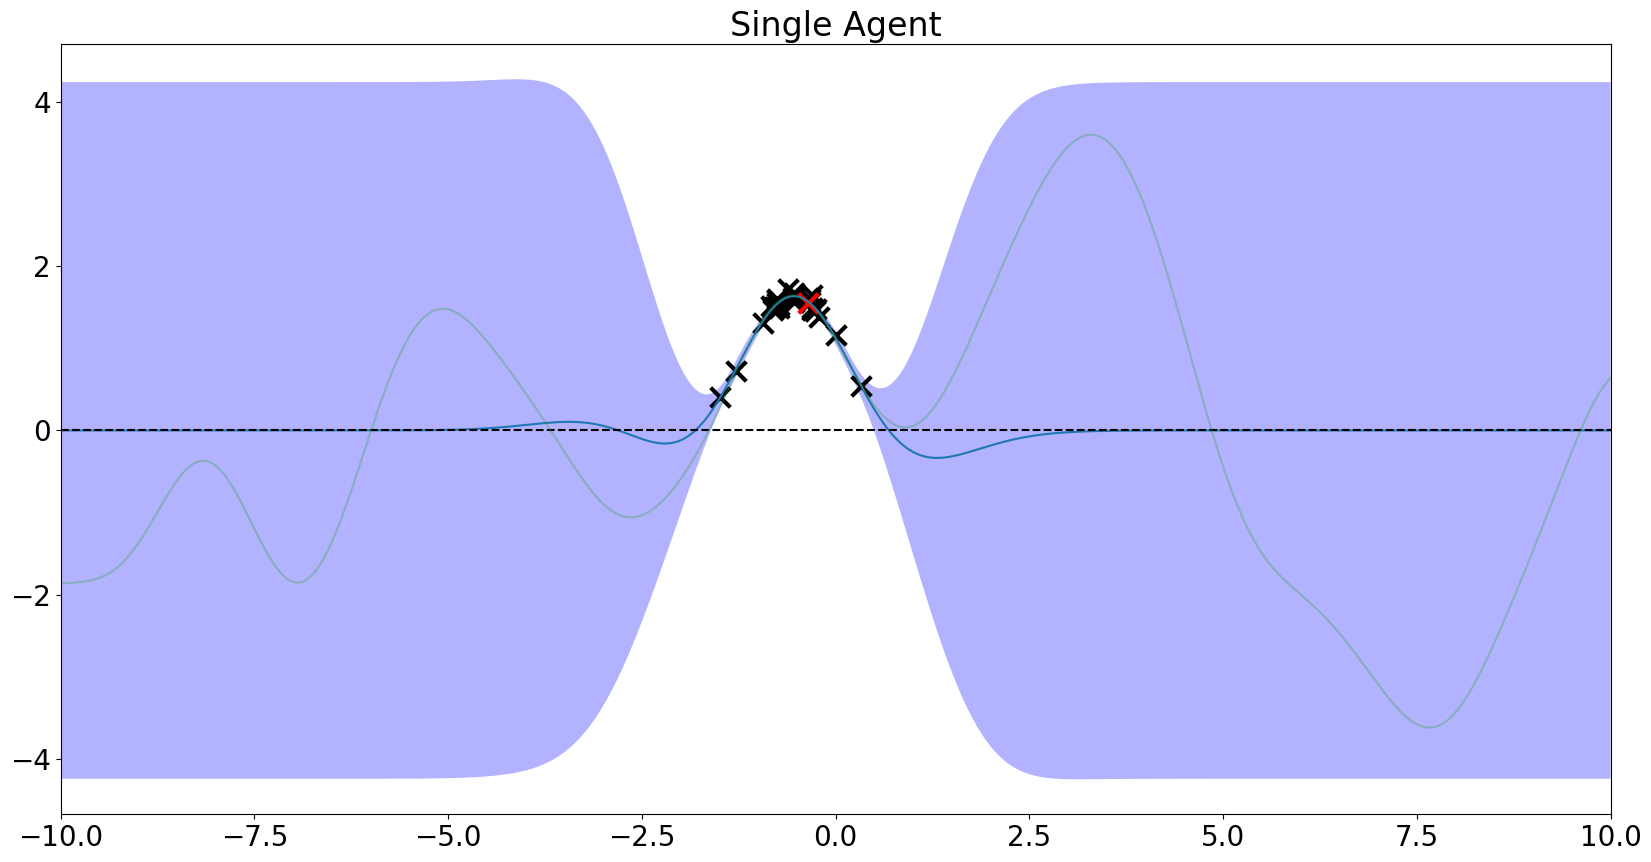

In [5]:
for t in range(30):

    x_next = opt.optimize()
    y_next = fun(x_next)
    opt.add_new_data_point(x_next, y_next)

plot_gp()